In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mse(y, y_hat):
    return ((y - y_hat) ** 2).sum() / n

## Урок 7. Многомерный статистический анализ. Линейная регрессия

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

### Решение:

In [3]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])      # zp  
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) # ks
n = x.shape[0]

b_1 = (n * np.sum(x * y) - x.sum() * y.sum()) / (n * np.sum(x ** 2) - np.sum(x) ** 2)
b_0 = y.mean() - b_1 * x.mean()

In [4]:
y_hat_0 = b_1 * x
y_hat_1 = b_0 + b_1 * x

mse_0 = 1

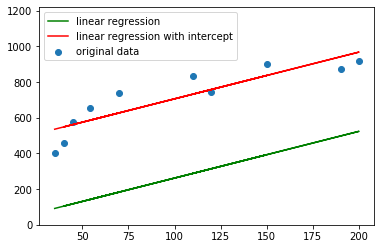

In [5]:
plt.scatter(x, y, label='original data')
plt.plot(x, y_hat_0, color='g', label='linear regression')
plt.plot(x, y_hat_1, color='r', label='linear regression with intercept')

plt.ylim(0, y.max() + 300)
plt.legend(loc="upper left")
plt.show()

In [6]:
df = pd.DataFrame(data={'x': x, 
                  'original': y, 
                  'linear regression': y_hat_0, 
                  'lin. reg. with intercept': y_hat_1})

df.loc[0] = ['', 'mse=0', f'mse={mse(y, y_hat_0)}', f'mse={mse(y, y_hat_1)}']

df

,x,original,linear regression,lin. reg. with intercept
0,,mse=0,mse=203763.93896082853,mse=6470.414201176658
1,45,574,117.924,562.102
2,190,874,497.902,942.08
3,200,919,524.108,968.285
4,40,459,104.822,548.999
5,70,739,183.438,627.615
6,54,653,141.509,585.686
7,150,902,393.081,837.258
8,120,746,314.465,758.642
9,110,832,288.259,732.437


### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

### Решение:

In [7]:
alpha = 1e-8
precision = 1e-10

b1 = 0
i = 0

cur_mse_1 = mse(y, x * b1)
prev_mse_1 = float("inf")

print('Iteration\tb1\t\tmse without intercept')

while True:    
    if prev_mse_1 - cur_mse_1 > precision:
        prev_mse_1 = cur_mse_1
        b1 -= alpha * (2 / n) * np.sum((b1 * x - y) * x)  
        cur_mse_1 = mse(y, x * b1)
           
    if i % 10000 == 0:
        print(f'{i}\t\t{b1:.8f}\t{cur_mse_1:.11f}')
        
    if prev_mse_1 - cur_mse_1 <= precision:
        print(f'{i - 1}\t\t{"?":8}\t{prev_mse_1:.11f}')
        print(f'{i}\t\t{b1:.8f}\t{cur_mse_1:.11f}')
        break
    
    i += 1

Iteration	b1		mse without intercept
0		0.00162283	534163.57726276317
10000		5.51553990	58446.76588620654
20000		5.86602945	56524.65610949114
30000		5.88830816	56516.88992190772
40000		5.88972429	56516.85854301858
50000		5.88981431	56516.85841623375
51480		?       	56516.85841594691
51481		5.88981636	56516.85841594682


### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

### Решение:

Таблица значений функции Лапласа используется в случае, если известно среднеквадратичное отклонение генеральной последовательности. Иначе используется таблица критических точек распределения Стьюдента.

### *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

### Решение:

In [8]:
alpha = 1e-8
beta = 1e-3
precision = 1e-10

b1 = b0 = 0
i = 0

cur_mse_1 = mse(y, x * b1)
cur_mse_0 = mse(y, b0 + b1 * x)

prev_mse_0 = prev_mse_1 = float("inf")

print('Iteration\tb1\t\tmse without intercept\t\tb0\tmse with intercept')

while True:    
    if prev_mse_1 - cur_mse_1 > precision:
        prev_mse_1 = cur_mse_1
        b1 -= alpha * (2 / n) * np.sum((b1 * x - y) * x)  
        cur_mse_1 = mse(y, x * b1)
        
    if prev_mse_0 - cur_mse_0 > precision:
        prev_mse_0 = cur_mse_0
        b0 += beta
        cur_mse_0 = mse(y, b0 + b1 * x)
        
    if i % 10000 == 0:
        print(f'{i}\t\t{b1:.8f}\t{cur_mse_1:.11f}\t\t{b0:.3f}\t{cur_mse_0:.11f}')
        
    if prev_mse_1 - cur_mse_1 <= precision and prev_mse_0 - cur_mse_0 <= precision:
        print(f'{i - 1}\t\t{"?":8}\t{prev_mse_1:.11f}\t\t{"?":3}\t{prev_mse_0:.11f}')
        print(f'{i}\t\t{b1:.8f}\t{cur_mse_1:.11f}\t\t{b0:.3f}\t{cur_mse_0:.11f}')
        break
    
    i += 1

Iteration	b1		mse without intercept		b0	mse with intercept
0		0.00162283	534163.57726276317		0.001	534162.15779287391
10000		5.51553990	58446.76588620654		10.001	55533.99956499091
20000		5.86602945	56524.65610949114		20.001	52321.08141010444
30000		5.88830816	56516.88992190772		30.001	50647.19110867022
40000		5.88972429	56516.85854301858		40.001	49102.15665252824
50000		5.88981431	56516.85841623375		50.001	47749.45017412934
60000		5.88981636	56516.85841594682		60.001	46596.03850918227
70000		5.88981636	56516.85841594682		70.001	45642.60608209179
80000		5.88981636	56516.85841594682		80.001	44889.17365500024
90000		5.88981636	56516.85841594682		90.001	44335.74122791061
100000		5.88981636	56516.85841594682		100.001	43982.30880082287
110000		5.88981636	56516.85841594682		110.001	43828.87637373705
112672		?       	56516.85841594691		?  	43821.73881322004
112673		5.88981636	56516.85841594682		112.674	43821.73881497733
